# Phase 1: Exploratory Analysis

In this phase of the project, we get to "know the data". The aim here is to get a "good enough" understanding of what data we are dealing with, and gain insightsts which could help us later down the line. In is important not to get stuck down in this phase of the project, as we will be doing further analysis in other phases. 

As a starting point, we'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)


But first, lets import the necessary libraries and load our data.
This shall be step 0.

## Step 0: Import Libraries and Load Data

In [40]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

With the libraries loaded, let's import the data for analysis.

In [41]:
# Import the data from csv file
df = pd.read_csv('project_files/real_estate_data.csv')

Now we are all set to explore the data!

<br id="basic">
## Step 1. Basic information

Let's start with the basic informaiton about the dataset.




Q.1 What are the dimensions of the dataset?

In [42]:
# Dimensions of the dataframe
df.shape

(1883, 26)

Ans.1 There are 1883 observations (rows) and 26 features (columns) in the imported dataset.

<br>
Q.2 What are the data types of these 26 features?


In [43]:
# Type of the features (columns)
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object


Ans.2 Looks like majority of the data types are numeric (int64 and float64), except for 3 categorical (object):
1. property_type
2. exterior_walls
3. roof

To help better understand the dataset, let's see some observations.

In [44]:
# Display the first 5 rows of the df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


At this stage, having a quick look at the data, all the feautres and their data types makes sense.
<br>
From the output above, we can see that some of the observations have missing values ("NaN") which we address in the later phases of the project. 

<br>
Having a basic undersating of the dataset, let's explore further, focusing on the numeric features.

<br id="numeric">
## Step 2. Distributions of Numeric Features

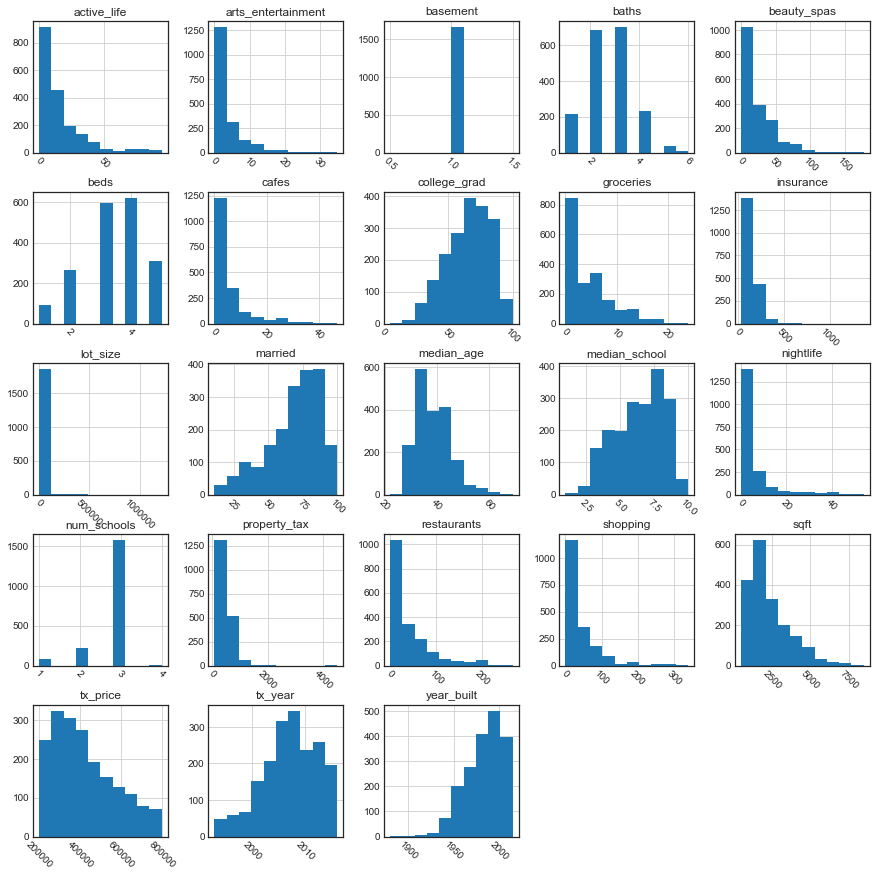

In [45]:
# Plot histogram grid of the numeric features, with figure size of 15 by 15, and the x-axis lables rotated 45 degrees clockwise.
df.hist(figsize=(15,15), xrot=-45)

# Clear the text "residue"
plt.show()

In [46]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<br id="categorical">
## 3. Distributions of categorical features

Now let's take a look at the distributions of our categorical features.

<br>
Display summary statistics for categorical features.

In [47]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


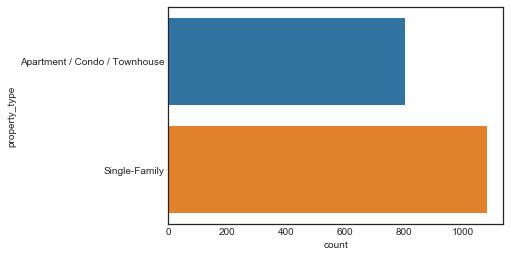

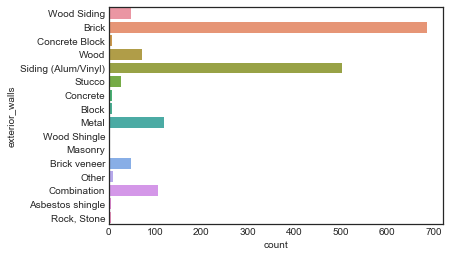

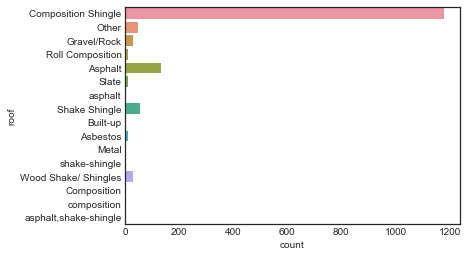

In [48]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()


<br id="segmentations">
## 4. Segmentations

Next, let's create some segmentations.
<br>Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code> and plot the resulting distributions

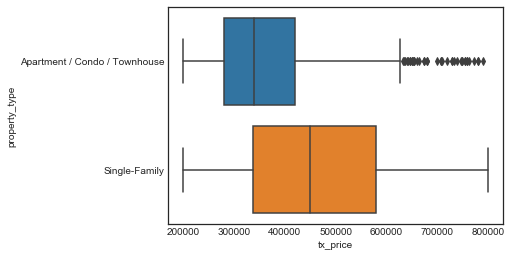

In [49]:
sns.boxplot(y='property_type', x='tx_price', data=df)
plt.show()

In [50]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<br id="correlations">
## 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>
Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [51]:
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


Visualize the correlation grid with a heatmap to make it easier to digest.


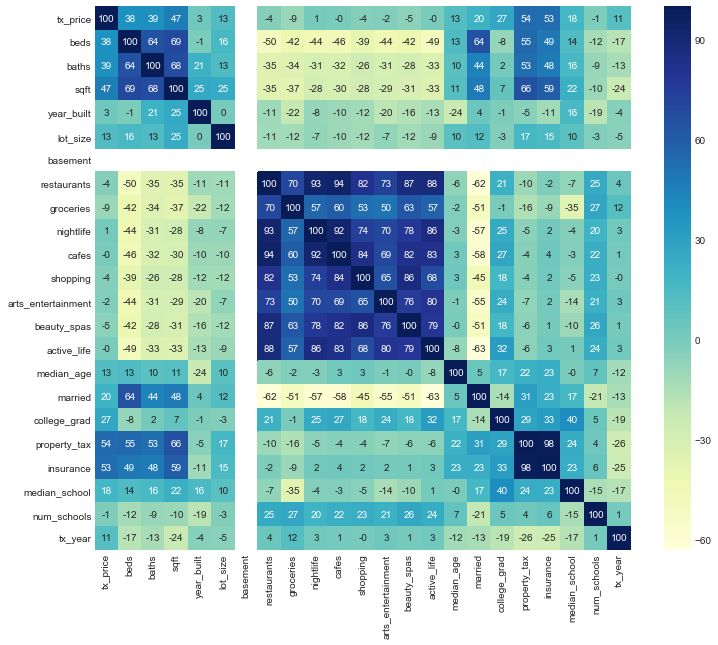

In [52]:
# Change color scheme
sns.set_style('white')

# Make the figsize 12 x 10
plt.figure(figsize=(12,10))

# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', cmap="YlGnBu")
plt.show()

# Phase 2: Data Cleaning

Now that we know a bit about the data we are dealing with, we shall proceed with cleaning the data.
This is one of the most important part of the project. Hvaving clean dataset can make or break our project.
If we feed poor data into a fancy anlgorithm, we can only expect poor results.

<br>
Let's get on with the cleaning.

## Step 1: Remove duplicates

In [53]:
# Drop duplciates from the dataset
df = df.drop_duplicates()

# Let's see if any duplicates were dropped
df.shape

(1883, 26)

Looks like there were no duplciates, as the shape of the dataset is the same as the original.

## Step 2: Fix Structural Errors

From Phase 1, we did notice that the basement feature had a STD of 0 and some of the observations were NaN.
That's interesting, as we might be able to turn that into a true indicator type.

<br>
Let's check the unique values in this feature.

### 2.1 Indicator variables

In [54]:
# Unique value for basement
df.basement.unique()

array([nan,  1.])

Let's fix the missing values.

In [55]:
# Missing basement values will be 0
df['basement'] = df.basement.fillna(0)

Confirm that we have a true indicator variable

In [56]:
# Unique value for basement
df.basement.unique()

array([0., 1.])

Basement featured fixed!

### 2.2 Typos and Capitalization

Let's correct any typos and Capilization issues.

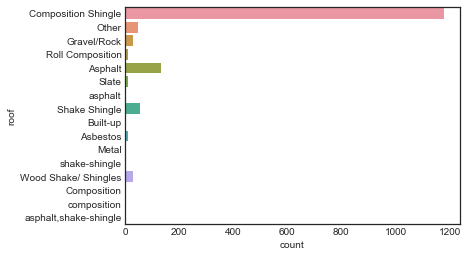

In [57]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

In [58]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

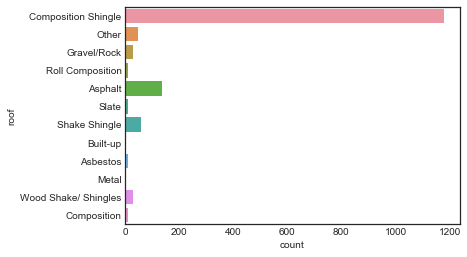

In [60]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

Looks much better now!!
<br>
Now let's check out the clases in 'exterior_walls'!

### 2.3 Mislabelled Classes

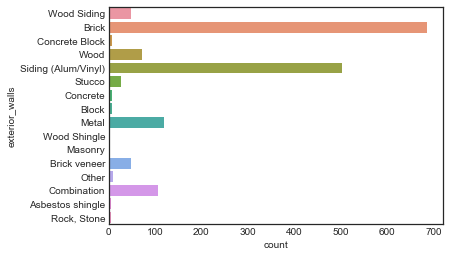

In [61]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

Let's fix the mislabelled classes.

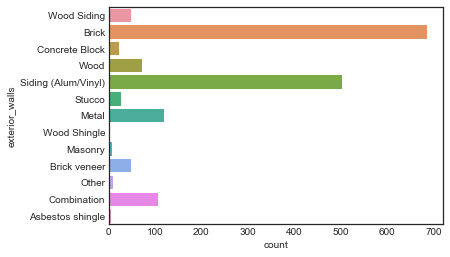

In [63]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

Yes, now that's cleaner!

## Step 3. Remove Unwanted Outliers

Outliers can cause unwanted issues later down the workflow.
<br>
Unwanted outliers can reduce the performance of your models.

Let's start by examining the target variable for unwanted outlier.
<br>
For this we will use a violin plot.

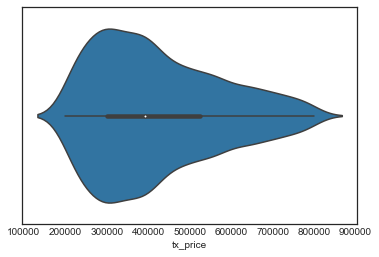

In [65]:
# Violin plot of 'tx_price' using the Seaborn library
sns.violinplot(df.tx_price)
plt.show()

Nothing out of the ordinary here. 
Let's plot the other variables and see.

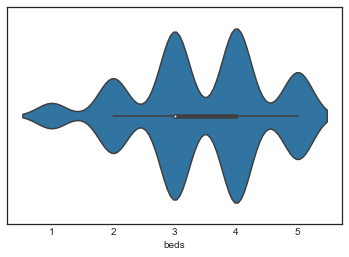

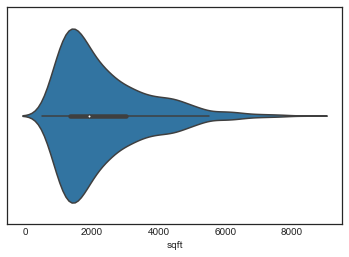

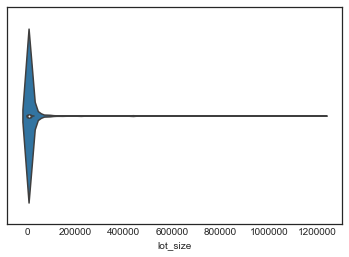

In [68]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

Look's like there is a potential outlier in the 'lot_size' feature.
<br>
Look at the long skinny tail of the plot.
<br>
Let's sort the values and examine the top 5 values.


In [69]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The larget lot size is 1220551 and the next highest value is 436471.Let's remove this outlier.

In [71]:
# Remove df values greater than 500000
df = df[df.lot_size <= 500000]
# print length of df
print( len(df) )

1882


Done!

### Step 4. Address Missing Categorical Data

In [73]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [74]:
# Fill missing categorical values with 'Missing'
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

In [75]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Done!

### Step 5. Addresss fill missing numeric data


In [83]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Looks like there is nothing missing!

Let us save the cleaned data, before we proceed with the remaining phase of the data science project.

In [82]:
# Save cleaned dataframe to new file
df.to_csv('project_files/cleaned_df.csv', index=None)

With are data cleaned and saved, we are all ready to proceed :)

# Phase 3: Feature Engineering

This is an important phase of the data science workflow where we will engineer features from existing ones.
<br>
This is the phase where domain knowledge and knowloedge from others might be very helpful to create a roboust predictive model.

### Step 1 Indicator Variables
As an example, let's create an indicator varibale for properties with 2 beds and 2 baths. These properties seem to be very popular among investors. Althoguh these information are availeb in the current dataset, they are not specifically isolated for now.

In [118]:
# Load cleaned dataset from Module 2
df = pd.read_csv('project_files/cleaned_df.csv')

# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [119]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09458023379383634

Looks like 9.4 % of the properties have 2 bed and 2 bathrooms.

Additionally, let's create another indciator for the housing market during recession.
<br>
According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

In [120]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

In [121]:
# Print percent of transactions where during_recession == 1
print( df.during_recession.mean() )

0.2635494155154091


Looks like 26% of the transcations happened during recession.

### Step 3. Create Interaction Features
Interaction features are operations between two or more other featuress. Let's see if we can create some sensable onese here.

In [122]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

It's always good to do some sanity check when we create a feature. 

In [123]:
# Should not be less than 0
print( df.property_age.min() )

-8


Looks like something has gone wrong, the age of the property shouldnt be less than 0.
<br>
Let's investigate.

In [124]:
# Number of observations with 'property_age' < 0
print( sum(df.property_age < 0) )

19


Hmm.. let's remvoe these observations where the property age is less than 0.


In [125]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print( len(df) )

1863


Now let's create another feature, that indicates the number of quality schools nearby.
<br>
To do this we will use the 'num_schools' feature for number of schools nearby and multiple it with the 'median_schools' feature which indicates the medain quality score of the schools.

In [126]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [127]:
# Display median school score
df.school_score.median()

18.0

### Step 3. Group Sparse Classes
Sparse classes are those that have very few total observations.
Let's take care of them as they can be problamatic for our machine learning algorithms.

Let's begin with the 'exterior_walls' feature.

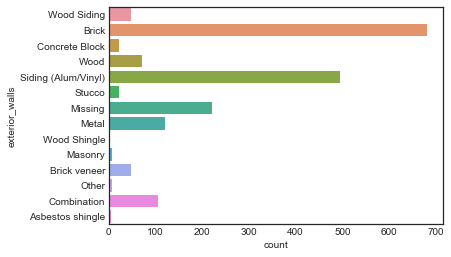

In [128]:
# Bar plot for exterior walls
sns.countplot(y='exterior_walls', data=df)

From the looks of it, we can combine the classes 'Wood Siding', 'Wood Shingle' and 'Wood', into a single class of 'Wood'.

In [129]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

Let's group the other sparse classes into a single 'Other' class.  

In [130]:
# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

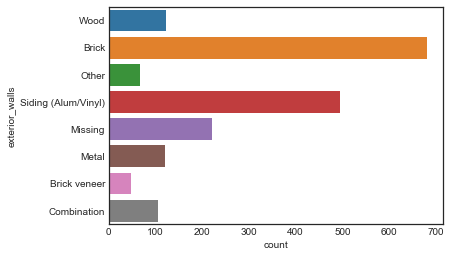

In [131]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

Now, that's better!
Let's do the same with the 'roof' feature.

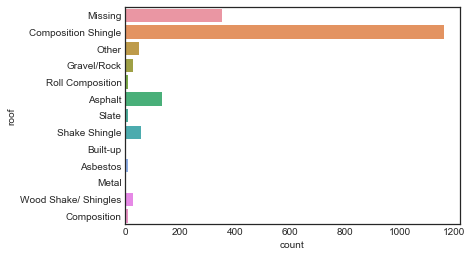

In [132]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

In [133]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [134]:
# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

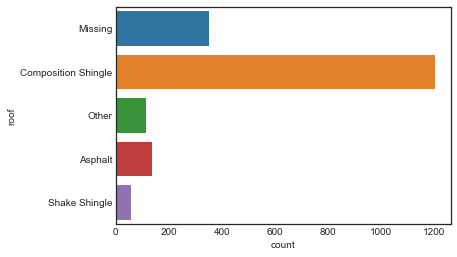

In [135]:
# Bar plot for roof
sns.countplot(y='roof', data=df)

## Step 4. Encode dummy variables

Scikit-Learn machine learning algorithms cannot directly handle categorical features.
<br>
Specifically, they cannot handle text values.

<br>
Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

In [136]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [138]:
# let's jave a look at the dummy features
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [141]:
# let's see what the shape of the dataframe now is
df.shape

(1863, 42)

We now have 42 features in our dataset.

### Step 5. Remove unused or redundant features

In [142]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)

In [144]:
# Save analytical base table
df.to_csv('project_files/analytical_base_table.csv', index=None)

# Phase 5. Model Training

Finally, we are all set to build our model.
Let's get to it.

In [145]:
# Pandas for DataFrames
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Scikit-Learn for Modeling
import sklearn

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [147]:
# Load cleaned dataset from file
df = pd.read_csv('project_files/analytical_base_table.csv')

### Step 1. Split dataset into test/train (20/80)

In [148]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [149]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [150]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)


### Step 2. Build Model Pipelines


In [158]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

Let's create a pipelines dictionary loaded with the modelling algorithms. 

In [165]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

Let us now define the model hyper-parameters for each of these algorithms.

In [166]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

Let us now create a hyperparameters dictionary for easy access.

In [167]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

Now let's check if eveything is setup properly.

In [168]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


With our pipelines and hyperparameters declared, we are ready to tune our models with cross-validation.

### Step 4. Cross-Validation

In [169]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

 Now let's loop through all the pipelies and using the GridSearchCV class fir the model on the X_train  and y_train.
 

In [170]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [171]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


Finally, lets make sure that the models have been fitted correctly.


In [172]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


### Step 5. Select Winner

With our models trained (fitted) with the best hyperparameetrs (tahnks to the GridSearchCV class), it's time to select a winner.

To do this, let us first check the best cross valdiation score for each of the models.
<br>
This score represents the holdout R^2 value for each fitted model. 

In [174]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.30862750859376537
ridge 0.3166111585985649
enet 0.3428746286638919
rf 0.4815967347888209
gb 0.4869720585739858


In [175]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Finally, let's see how the fitted models perform on the test set!


In [176]:
# Loop throught each fitted model and check the R^2 and mean absolute error on the test set. 
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print('\n')

lasso
--------
R^2: 0.40888624716724375
MAE: 85035.54246538793


ridge
--------
R^2: 0.4093396476329719
MAE: 84978.03564808934


enet
--------
R^2: 0.4052451373117356
MAE: 86298.6372531255


rf
--------
R^2: 0.5722509742910005
MAE: 67962.75780160858


gb
--------
R^2: 0.5410951822821564
MAE: 70601.60664940192




To choose the winner, let's ask the following questions:
1. Which model had the highest R2 on the test set?<br>
   Random Forest.
2. Which model had the lowest mean absolute error?<br>
   Random Forest
3. Are these two models the same one?<br>
   Yes
4. Did it also have the best holdout R2 score from cross-validation?<br>
   Yes
5. Does it satisfy our win condition?<br>
   Yes, its mean absolute error is less than $70,000!
   



Random Forest is our winning model!!<br>
Finally lets plot the performance of the the winning model on the test set.

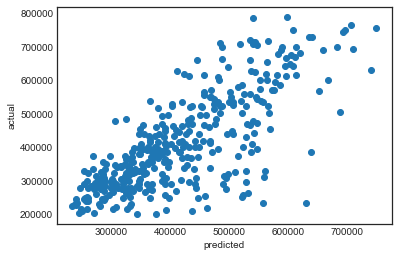

In [178]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


A 45 degree diagonal scatter of the points visually indicate a great performance of our model.

# Save Model

Finally, let's save the winning real estate predection model for later use/ supplying to our client.

In [180]:
# Import pickle to save pithon object to disk
import pickle

# Write the winning model to disk for later use
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

The end! :)